# Connect google drive

In [ ]:
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd drive/MyDrive/football_analysis

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

## Install dependencies

In [ ]:
!pip install -q ultralytics roboflow

## Imports

In [ ]:
from roboflow import Roboflow
from IPython.display import Image

## Pull dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

rf = Roboflow(api_key='lBA8e9Ed1FdiTmZbCRC1')

project = rf.workspace("roboflow-jvuqo").project("football-field-detection-f07vi")
version = project.version(12)
dataset = version.download("yolov8")

**NOTE:** Update `data.yaml` structure to align with the latest requirements of the `ultralytics` package.

In [ ]:
!sed -i 's|\(train: \).*|\1../train/images|' /content/drive/MyDrive/notebooks/datasets/football-field-detection-12/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' /content/drive/MyDrive/notebooks/datasets/football-field-detection-12/data.yaml

## Custom training

In [ ]:
PROJECT = '/content/drive/MyDrive/football_analysis_shared/models/500'
DATA = '/content/drive/MyDrive/football_analysis_shared/datasets/football-field-detection-12/data.yaml'
LAST_MODEL = '/content/drive/MyDrive/football_analysis_shared/models/500/train/weights/last.pt'

In [ ]:
%cd {HOME}

!yolo task=pose \
mode=train \
model={LAST_MODEL} \
data={DATA} \
batch=16 \
epochs=100 \
imgsz=640 \
mosaic=0.0 \
plots=True \
project={PROJECT}

In [ ]:
!ls {PROJECT}/train/

args.yaml			 PoseF1_curve.png     train_batch1261.jpg
BoxF1_curve.png			 PoseP_curve.png      train_batch1262.jpg
BoxP_curve.png			 PosePR_curve.png     train_batch1.jpg
BoxPR_curve.png			 PoseR_curve.png      train_batch2.jpg
BoxR_curve.png			 results.csv	      val_batch0_labels.jpg
confusion_matrix_normalized.png  results.png	      val_batch0_pred.jpg
confusion_matrix.png		 train_batch0.jpg     weights
labels.jpg			 train_batch1260.jpg


[Errno 2] No such file or directory: '/content/drive/.shortcut-targets-by-id/1gOWLO0Llz28kf7Np1xryx81WP4gpDIIN/football_analysis'
/content/drive/.shortcut-targets-by-id/1gOWLO0Llz28kf7Np1xryx81WP4gpDIIN/football_analysis 


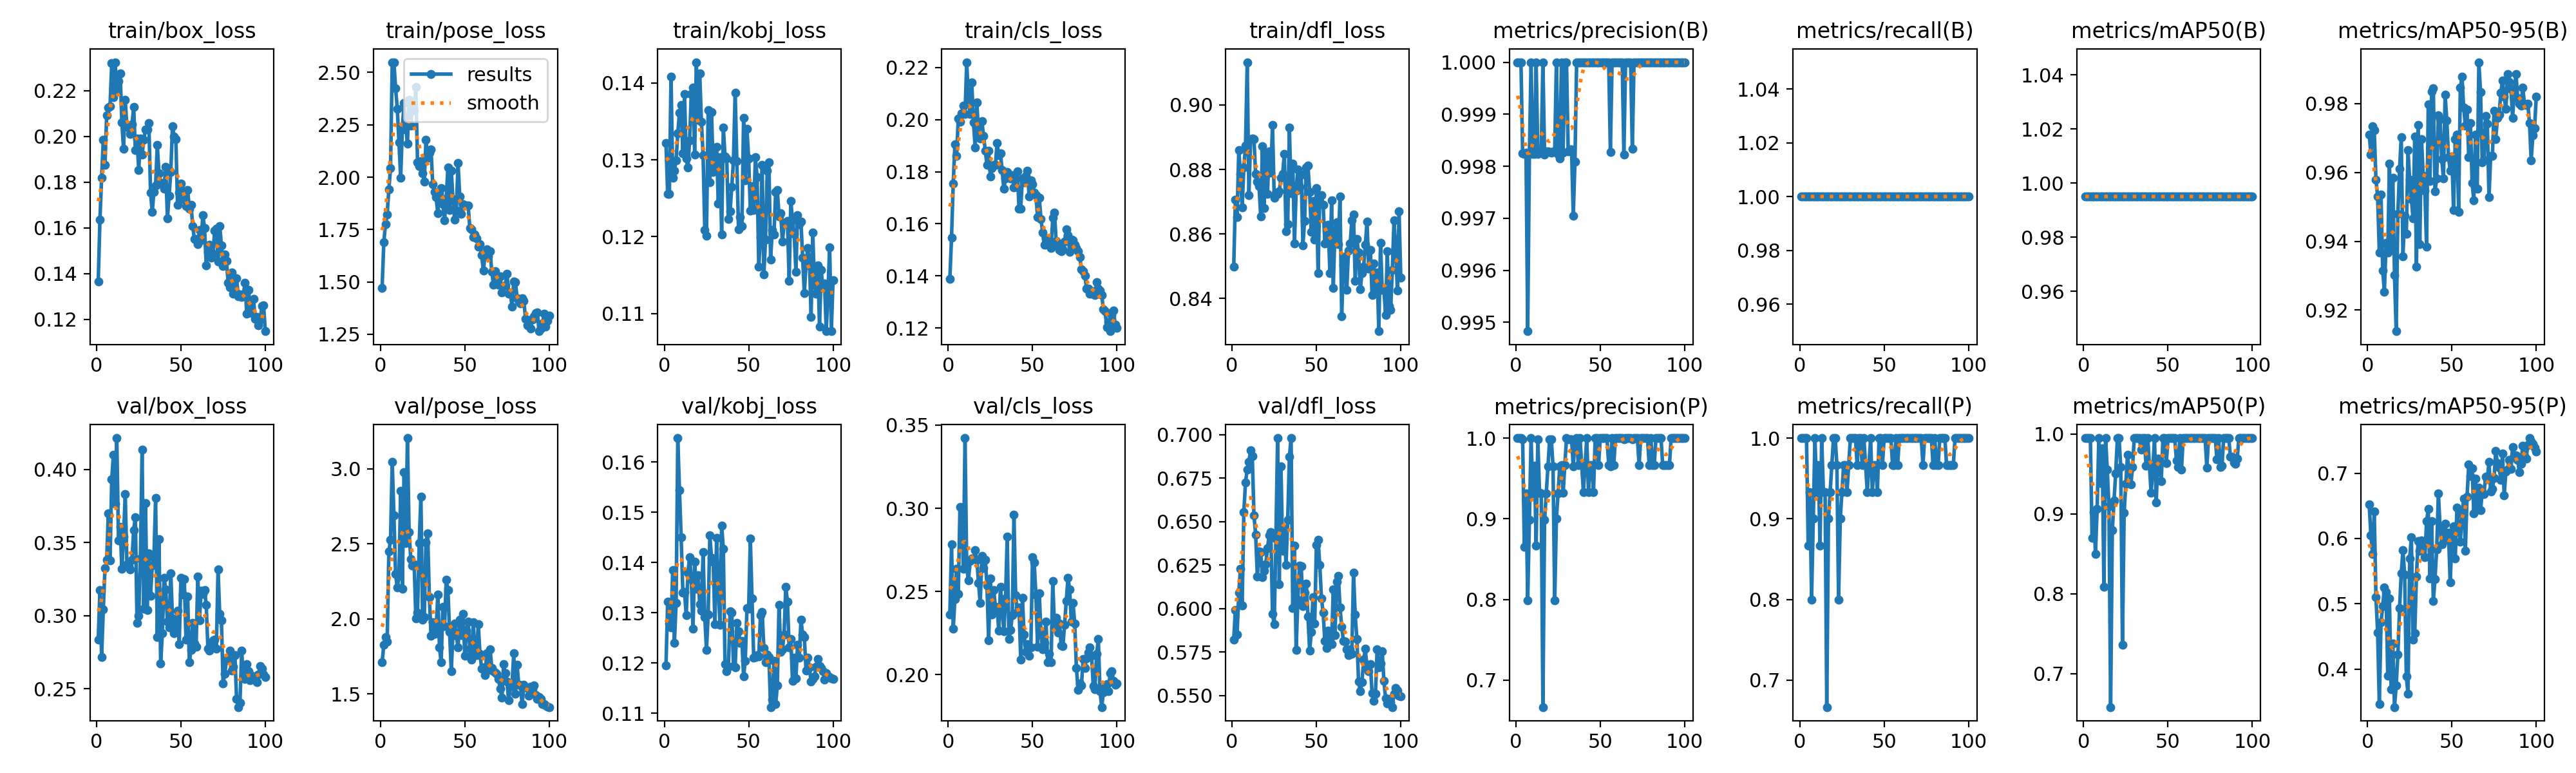

In [ ]:
%cd {HOME}
Image(filename=f'{PROJECT}/train/results.png', width=1500)

[Errno 2] No such file or directory: '/content/drive/.shortcut-targets-by-id/1gOWLO0Llz28kf7Np1xryx81WP4gpDIIN/football_analysis'
/content/drive/.shortcut-targets-by-id/1gOWLO0Llz28kf7Np1xryx81WP4gpDIIN/football_analysis 


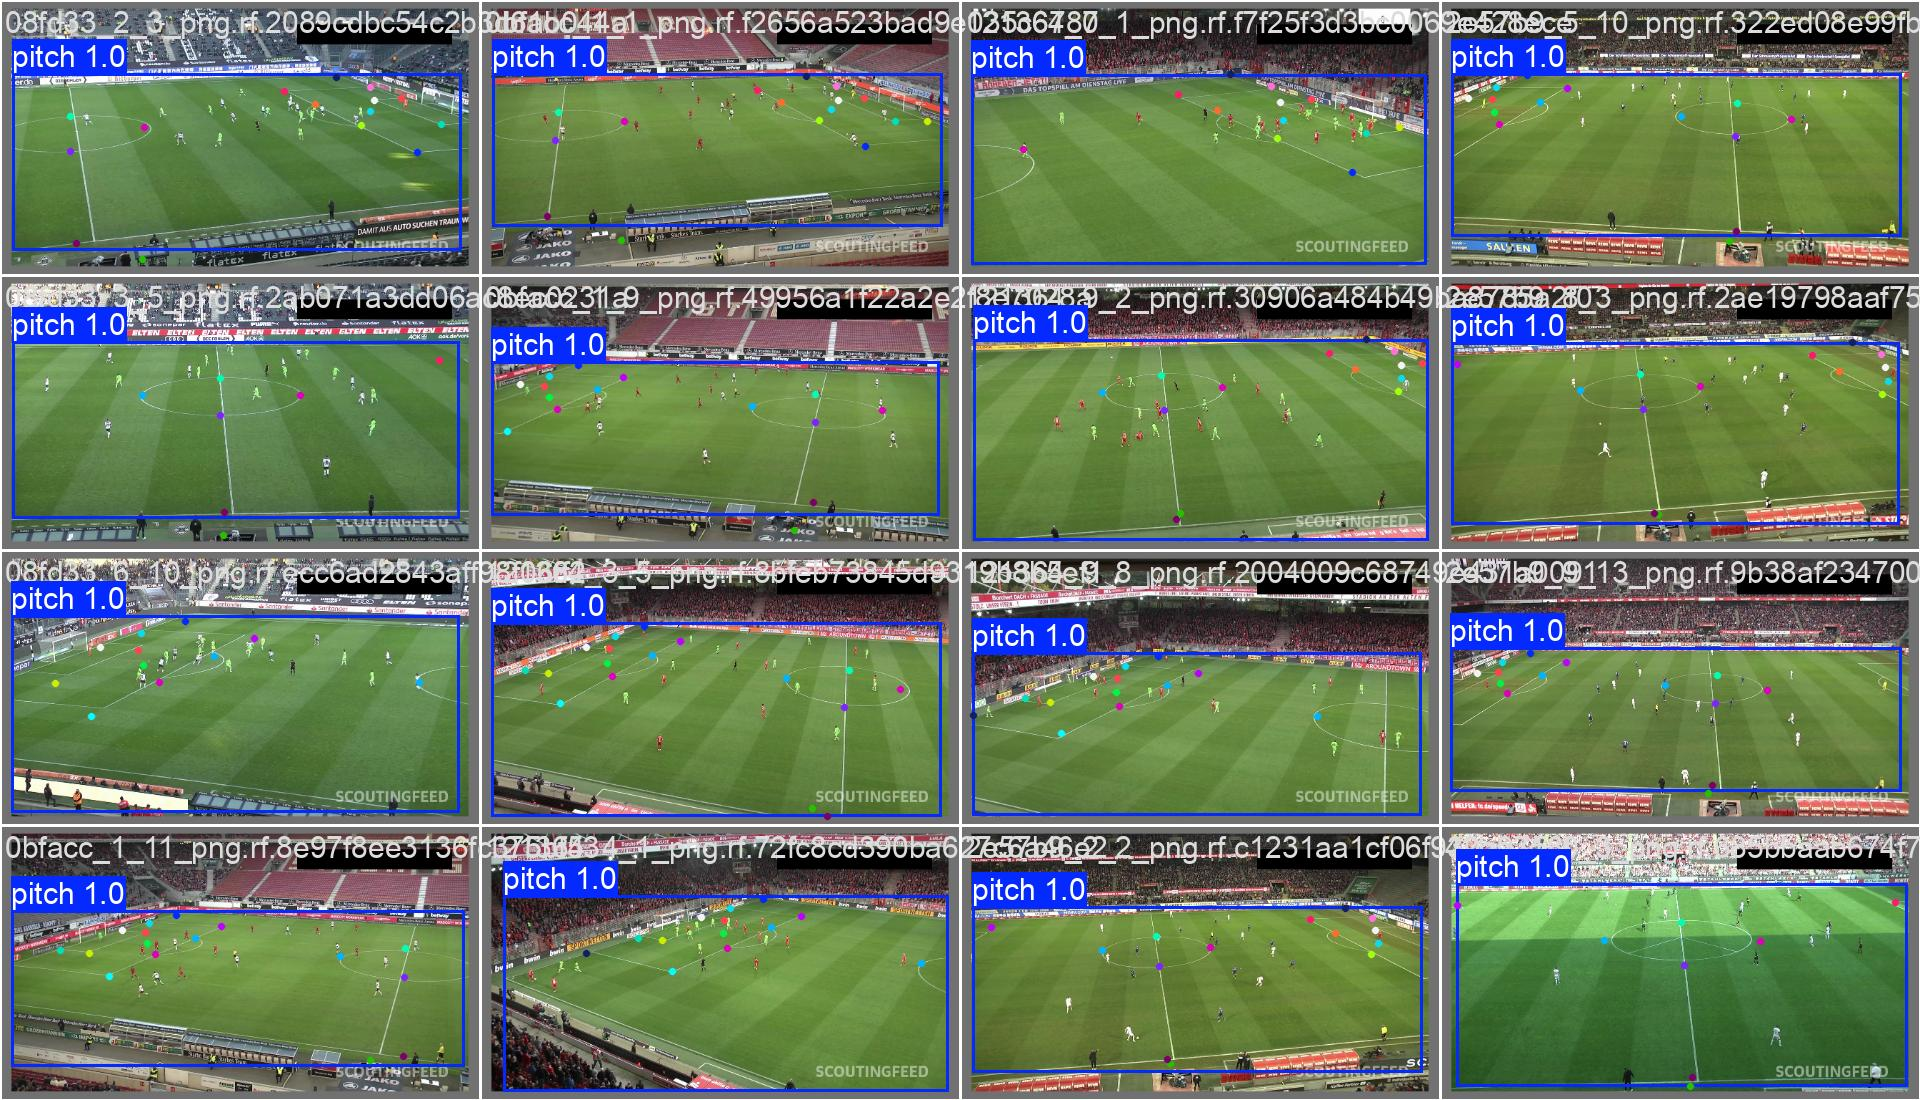

In [ ]:
%cd {HOME}
Image(filename=f'{PROJECT}/train/val_batch0_pred.jpg', width=1500)

## Validate custom model

In [ ]:
%cd {HOME}

!yolo task=pose mode=val model={PROJECT}/train/weights/best.pt data={DATA} project={PROJECT}